<a href="https://colab.research.google.com/github/tsffarias/My-Books/blob/main/An%C3%A1lise_Explorat%C3%B3ria_Meus_Livros_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória Dataset Meus_Livros
* **Base de dados:** Meus_Livros
* **Analista de Dados:** Thiago Silva

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df_my_books = pd.read_csv('/content/drive/MyDrive/datasets/my_books_data/All_the_Books_I_read.csv', sep=';')
df_my_books.head()

,id,titulo,autor,numero_paginas,data_leitura,nacionalidade_autor,idioma_obra_original,idioma_da_obra_lido
0,1,The little Prince,Antoine de Saint-Exupéry,96,2016,França,Francês,Português
1,2,How to win friends and influence people,Dale Carnegie,288,2016,EUA,Inglês,Inglês
2,3,O alquimista,Paulo Coelho,197,2016,Brasil,Português,Português
3,4,Crush it!,Gary Vaynerchuk,142,2016,Bielo-Rússia,Inglês,Inglês
4,5,The thank you Economy,Gary Vaynerchuk,256,2016,Bielo-Rússia,Inglês,Inglês


In [15]:
df_my_books.shape

(82, 8)

In [16]:
df_my_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    82 non-null     int64 
 1   titulo                82 non-null     object
 2   autor                 82 non-null     object
 3   numero_paginas        82 non-null     int64 
 4   data_leitura          82 non-null     int64 
 5   nacionalidade_autor   82 non-null     object
 6   idioma_obra_original  82 non-null     object
 7   idioma_da_obra_lido   82 non-null     object
dtypes: int64(3), object(5)
memory usage: 5.2+ KB


In [17]:
qtd_livros_por_ano = df_my_books["data_leitura"].value_counts().to_frame()
livros_por_ano = qtd_livros_por_ano.rename(columns={"data_leitura": "qtd_livros"})
media_livros_ano = livros_por_ano['qtd_livros'].mean()

print(f'Média de livros lido por ano: {round(media_livros_ano)}')

Média de livros lido por ano: 14


In [18]:
print(f'Número total de livros lido até o momento: {df_my_books["id"].count()}')

Número total de livros lido até o momento: 82


In [19]:
print(f'Número total de páginas lido até o momento: {df_my_books["numero_paginas"].sum()}')

Número total de páginas lido até o momento: 15924


In [20]:
# quantidade de paginas por ano
qtd_paginas_por_ano = df_my_books.groupby("data_leitura")["numero_paginas"].sum().to_frame()
qtd_paginas_por_ano

,numero_paginas
data_leitura,
2016,5372
2017,3130
2018,3457
2019,1108
2020,1642
2021,1215


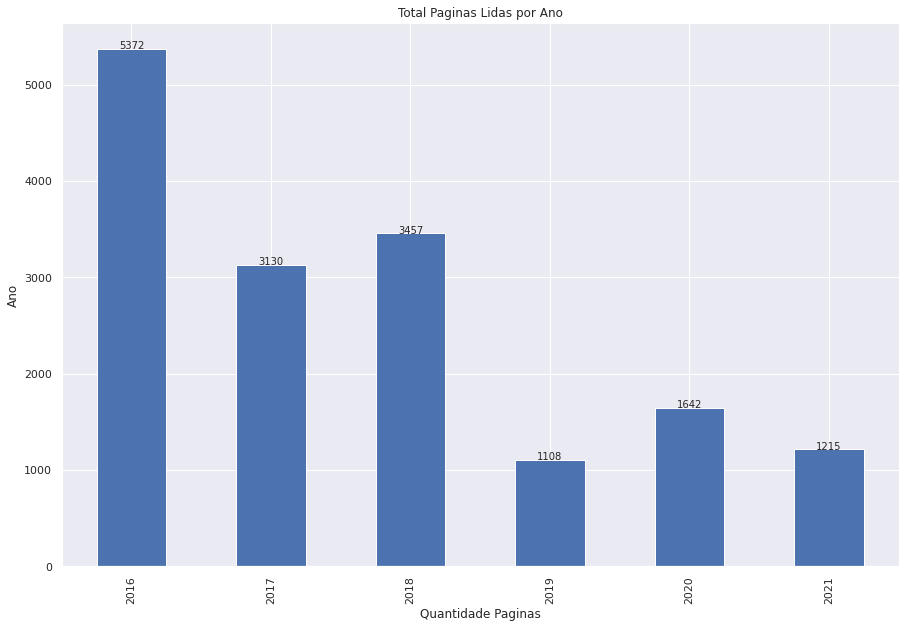

In [21]:
# grafico quantidade de paginas por ano
sns.set()
plt.figure(figsize=(15, 10))

plt.title('Total Paginas Lidas por Ano')
qtd_paginas_por_ano["numero_paginas"].plot.bar()

for index, data in enumerate(qtd_paginas_por_ano["numero_paginas"]):
    plt.text(x=index , y=data+1, s=f"{data}", fontdict=dict(fontsize=10), ha='center')

plt.xlabel('Quantidade Paginas')
plt.ylabel('Ano')

plt.show()

In [22]:
# quantidade de livros por ano
qtd_livros_por_ano = df_my_books["data_leitura"].value_counts().to_frame()
qtd_livros_por_ano = qtd_livros_por_ano.rename(columns={"data_leitura": "qtd_livros"})
qtd_livros_por_ano.sort_index(inplace=True)
qtd_livros_por_ano

,qtd_livros
2016,21
2017,15
2018,20
2019,9
2020,11
2021,6


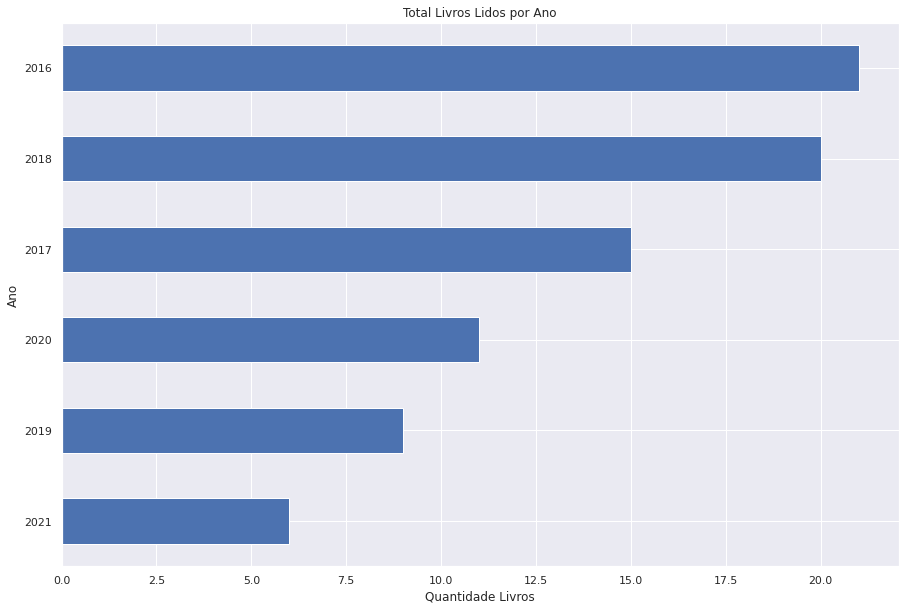

In [23]:
# grafico quantidade de livros por ano
sns.set()
plt.figure(figsize=(15, 10))

plt.title('Total Livros Lidos por Ano')
qtd_livros_por_ano["qtd_livros"].sort_values(ascending=True).plot.barh()

plt.xlabel('Quantidade Livros')
plt.ylabel('Ano')

plt.show()

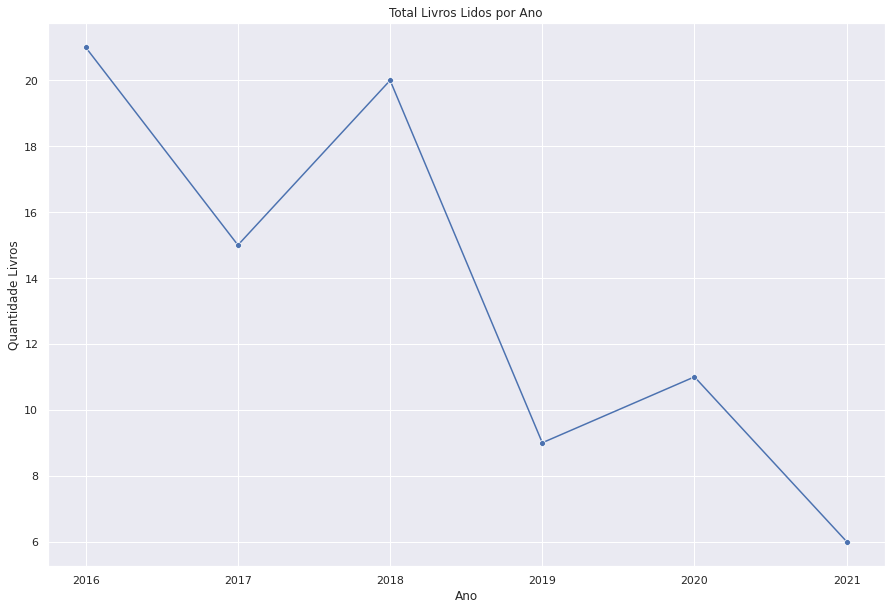

In [24]:
# grafico quantidade de livros por ano
sns.set()
plt.figure(figsize=(15, 10))

plt.title('Total Livros Lidos por Ano')
sns.lineplot(data=qtd_livros_por_ano, x=qtd_livros_por_ano.index, y=qtd_livros_por_ano["qtd_livros"], marker="o")

plt.xlabel('Ano')
plt.ylabel('Quantidade Livros')

plt.show()

In [25]:
# Quantidade de livros lidos por idioma
df_my_books["idioma_da_obra_lido"].value_counts()

Inglês       58
Português    24
Name: idioma_da_obra_lido, dtype: int64

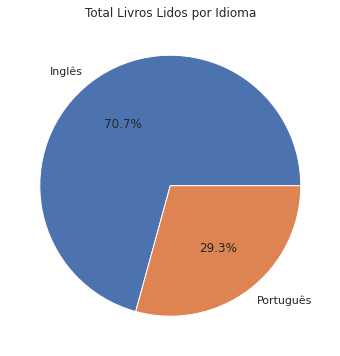

In [26]:
# Gráfico quantidade de livros lidos por idioma
sns.set()
plt.figure(figsize=(15, 10))
plt.title('Total Livros Lidos por Idioma')
df_my_books["idioma_da_obra_lido"].value_counts().plot.pie(figsize=(8, 6), autopct='%1.1f%%')

plt.ylabel('')
plt.show()

In [27]:
# Quantidade de livros lidos por idioma da obra original
qtd_livros_por_idioma_original = df_my_books["idioma_obra_original"].value_counts().to_frame()
qtd_livros_por_idioma_original = qtd_livros_por_idioma_original.rename(columns={"idioma_obra_original": "qtd_livros"})
qtd_livros_por_idioma_original

,qtd_livros
Inglês,59
Português,10
Alemão,3
Francês,2
Português-Portugal,2
Chinês Clássico,2
Russo,1
Latim,1
Grego,1
Italiano,1


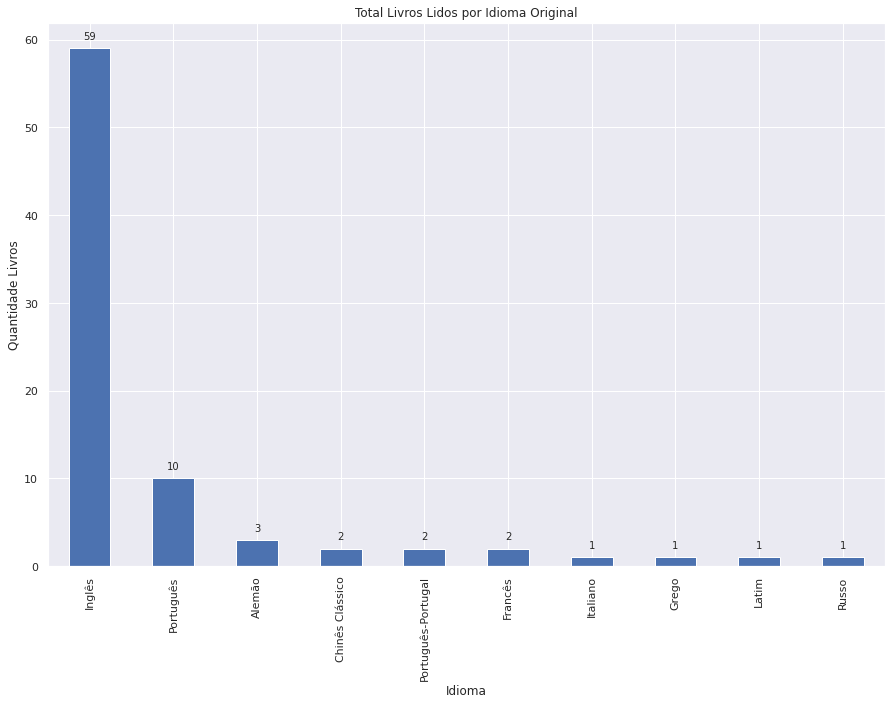

In [28]:
# grafico Quantidade de livros lidos por idioma da obra original
sns.set()
plt.figure(figsize=(15, 10))

plt.title('Total Livros Lidos por Idioma Original')
qtd_livros_por_idioma_original['qtd_livros'].sort_values(ascending=False).plot.bar()

for index, data in enumerate(qtd_livros_por_idioma_original['qtd_livros'].sort_values(ascending=False)):
    plt.text(x=index , y=data+1, s=f"{data}", fontdict=dict(fontsize=10), ha='center')

plt.xlabel('Idioma')
plt.ylabel('Quantidade Livros')

plt.show()

In [29]:
# Quantidade de livros lidos por nacionalidade do autor
qtd_livros_por_nacionalidade_autor = df_my_books["nacionalidade_autor"].value_counts()
percentual_qtd_livros_por_nacionalidade_autor = df_my_books["nacionalidade_autor"].value_counts(normalize = True) * 100
dist_freq_livros_por_nacionalidade_autor = pd.DataFrame({'qtd_livros': qtd_livros_por_nacionalidade_autor, 
                                                   'Porcentagem (%)': percentual_qtd_livros_por_nacionalidade_autor})

dist_freq_livros_por_nacionalidade_autor

,qtd_livros,Porcentagem (%)
EUA,33,40.243902
Brasil,11,13.414634
Inglaterra,10,12.195122
Bielo-Rússia,4,4.878049
Itália,3,3.658537
Alemanha,2,2.439024
Canadá,2,2.439024
Índia,2,2.439024
França,2,2.439024
China,2,2.439024


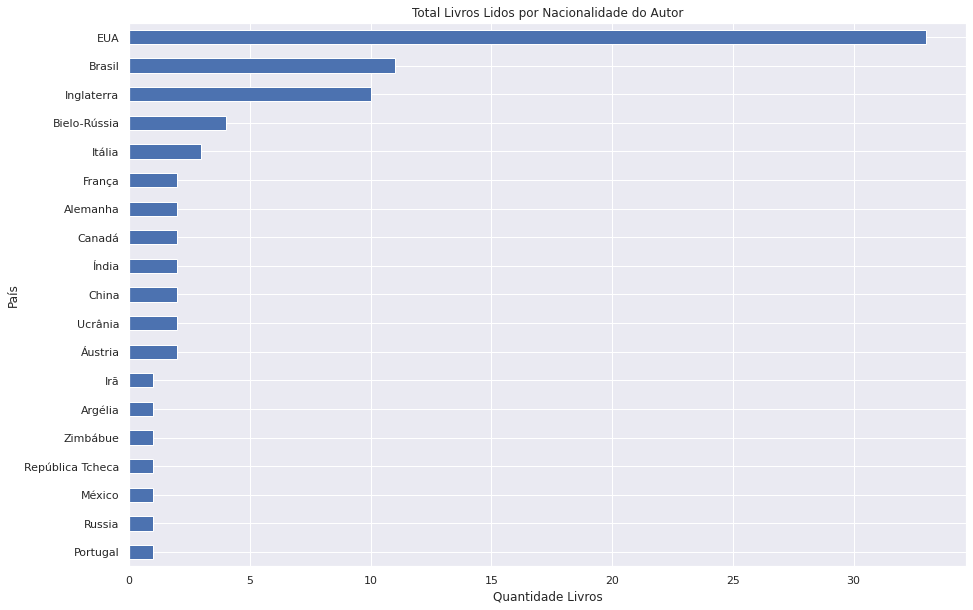

In [30]:
# Gráfico Quantidade de livros lidos por nacionalidade do autor
sns.set()
plt.figure(figsize=(15, 10))

plt.title('Total Livros Lidos por Nacionalidade do Autor')
dist_freq_livros_por_nacionalidade_autor['qtd_livros'].sort_values(ascending=True).plot.barh()

plt.xlabel('Quantidade Livros')
plt.ylabel('País')

plt.show()